In [1]:
from random import seed, random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from bisect import bisect_left
seed(666)

# Functions

Define a random hypercube of dimension  𝑛 with edges not sorted if bias=0, edges sorted in descending order if bias=1, or edges sorted in ascending order if bias=2.

In [2]:
def randcube(n,bias=0):
    graph = []
    for source in range(2**n):
        targets = set(range(n)) - set(i for i, digit in enumerate(reversed((bin(source)))) if digit == '1')
        randomlist = [random() for i in targets]
        weights = [float(k)/sum(randomlist) for k in randomlist]
        if bias == 1:
            weights.sort(reverse=True) 
        if bias == 2:
            weights.sort(reverse=False) 
        for i,t in enumerate(targets):
            graph.append((source,source+2**t,weights[i]))
    return graph

For two given graphs, define the $l_1$-metric of their weightings. We give the argument 'normalized= True' if we want to output the $l_1$-metric value normalized by the number of edges.

In [3]:
def area(g0,g1,normalized=False, sort=False):
    if sort:
        g0.sort(key=lambda x: (x[0], x[1]))
        g1.sort(key=lambda x: (x[0], x[1]))
    if normalized:
        return sum([abs(w-g1[i][2]) for i,(s,t,w) in enumerate(g0)])/len(g0)
    return sum([abs(w-g1[i][2]) for i,(s,t,w) in enumerate(g0)])

First, define a function that computes the symmetric difference metric for each filtration value, producing a curve. This function takes as inputs two graphs with the same edges and vertices, but different weights on the edges, and outputs the filtration values as an array and the corresponding values of the cardinality of the symmetric difference as a list.

In [4]:
def compare(g0,g1, resolution = 1000, normalized=False, sort=False):
    m = len(g0)
    if sort:
        g0.sort(key=lambda x: (x[0], x[1]))
        g1.sort(key=lambda x: (x[0], x[1]))
    merged = [(min(w,g1[i][2]),max(w,g1[i][2])) for i,(s,t,w) in enumerate(g0)]
    filt_val = np.linspace(0, max(d for (_,d) in merged), resolution)
    sym_card = [0 for _ in range(resolution)]
    for p0,p1 in merged:
        i = bisect_left(filt_val,p0)
        while filt_val[i]<p1:
            if filt_val[i]<=p0:
                i += 1
                continue
            if normalized:
                sym_card[i] += float(1/m)
            if not normalized:
                sym_card[i] += 1
            i += 1
    return (filt_val,sym_card)

Next, we define WFCC as a function that visualises the curve of the symmetric difference metric as a function of the filtration value, from the function 'compare' above. The output is the plot of the curves. For convenience, we also output the areas under the curves from the function 'area' above.

The inputs are:
- g0: graph to compare againts the others
- g1: list of graphs to compare each one against g0
- label_g0: name of the graph g0, as a string, for the title of the plot
- labels_g1: list of names of the graphs in g1, as strings, for the legend
- colors: list of colors, as strings, one for each graph in g1
- log: True or False. It returns the plot in logarithmic scale if True

In [5]:
def WFCC(g0, g1, label_g0, labels_g1, colors, log): #g1 is a list of graphs to compare with g0
    x=[]
    y=[]
    for g in g1:
        x_val,y_val = compare(g0,g,1000,False)
        x.append(x_val)
        y.append(y_val)
    fig,ax = plt.subplots(figsize=(6,5))
    for i in range(0, len(x)):
        plt.plot(x[i],y[i], label=labels_g1[i], c=colors[i])
    plt.title(label_g0 + " compared to:", fontsize=15)
    plt.xlabel("Filtration value", fontsize=13)
    plt.ylabel("Cardinality of symmetric difference", fontsize=13)
    plt.legend(loc='best', fontsize=13)
    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontsize(13)
    if log==True:
        plt.yscale('log')
    plt.savefig('./Data_files_hypercubes/Outputs_github/'+label_g0+'_vs.png')
    plt.show()
    for i in range(0, len(x)):
        print("The area under the curve for "+label_g0+" vs "+labels_g1[i]+" is: ", area(g0,g1[i]))

# Example

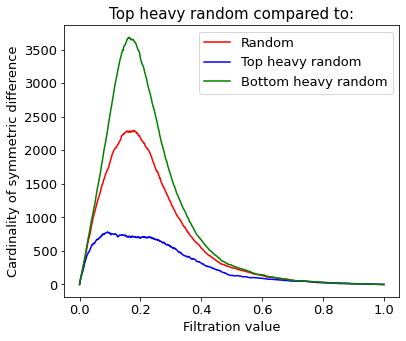

The area under the curve for Top heavy random vs Random is:  647.2378234794922
The area under the curve for Top heavy random vs Top heavy random is:  284.05277046514584
The area under the curve for Top heavy random vs Bottom heavy random is:  897.2783595966262


In [6]:
#dimnesion of the hypercube n
n=10

#define the random hypercubes to compare
g0 = randcube(n,bias = 1)
g1 = randcube(n,bias = 0)
g2 = randcube(n,bias = 1)
g3 = randcube(n,bias = 2)

#group together the hypercubes to compare with hypercube g0
g1=[g1,g2,g3]

#define labels and colours
label_g0='Top heavy random'
labels_g1=['Random', 'Top heavy random', 'Bottom heavy random']
colors=['red', 'blue', 'green']

#call the algorithm WFCC
WFCC(g0, g1, label_g0, labels_g1, colors, log=False)